In [1]:
import numpy as np
# from projectile import simulator_multioutput, print_results
# import mogp_emulator
import pandas as pd
from scipy.io import savemat, loadmat
try:
    import matplotlib.pyplot as plt
    makeplots = True
except ImportError:
    makeplots = False
import pickle
def lin2db(x):
    return 10*np.log10(x)
def db2lin(x):
    return 10**(x/10) 
from sklearn.linear_model import LinearRegression, BayesianRidge

In [2]:
launch_powers = loadmat("data/input_data_mW.mat")['lnch_pow_mW']
noise_powers = loadmat("data/output_data_mW.mat")['tot_noise_pow_mW']

In [66]:
num_channels = launch_powers.shape[1]
num_examples = launch_powers.shape[0]
num_train = 150
num_test = 100
channel_idx = 4
x_train = launch_powers[:num_train]
y_train = noise_powers[:num_train]
x_test = launch_powers[num_train:]
y_test = noise_powers[num_train:]

In [67]:
x_train.shape

(150, 5)

In [68]:
arr = np.zeros([150,15])
arr[:,:5] = x_train
arr[:,5:10] = x_train**2
arr[:,10:15] = x_train**3
arr.shape

(150, 15)

In [69]:
arr_test = np.zeros([100,15])
arr_test[:,:5] = x_test
arr_test[:,5:10] = x_test**2
arr_test[:,10:15] = x_test**3
arr_test.shape

(100, 15)

In [70]:
regressor_bayes = BayesianRidge()
# bayes_lin_reg = regressor_bayes.fit(arr, y_train)
bayes_lin_reg = regressor_bayes.fit(arr, y_train[:,channel_idx])

In [71]:
bayes_lin_reg.coef_

array([-3.89085640e-02, -8.19937233e-03, -2.16747664e-03, -5.24422528e-04,
        1.16708315e-02,  2.28044337e-02,  8.57439350e-03,  2.35840253e-03,
        9.54571572e-05,  2.64049447e-03, -3.58066200e-03, -2.40631250e-03,
       -5.84700273e-04,  1.69565600e-04, -6.68628723e-04])

In [73]:
lin2db(bayes_lin_reg.intercept_/5)

-23.577960648264682

In [55]:
print("R^2 =",regressor_bayes.score(arr, y_train[:,channel_idx]))

R^2 = 0.9968602173745293


In [56]:
print("R^2 =",regressor_bayes.score(arr_test, y_test[:,channel_idx]))

R^2 = 0.9963265715456762


In [57]:
y_pred = regressor_bayes.predict(arr_test)
# print("Training data MAE climb =", np.mean(abs(lin2db(y_test) - lin2db(y_pred))))
print("Training data MAE climb =", np.mean(abs(lin2db(y_test[:,channel_idx]) - lin2db(y_pred))))

Training data MAE climb = 0.05013429495750032


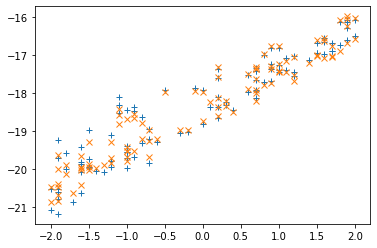

In [44]:
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(y_pred), '+')
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(y_test[:,channel_idx]), 'x')
plt.show()

In [75]:
arr_ex = np.zeros([100,15])
arr_ex[:,:5] = np.linspace(0,db2lin(2.0),100)
arr_ex[:,5:10] = np.linspace(0,db2lin(2.0),100)**2
arr_ex[:,10:15] = np.linspace(0,db2lin(2.0),100)**3
arr_ex.shape

ValueError: could not broadcast input array from shape (100,) into shape (100,5)